In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
from sklearn.svm import SVC

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)



In [3]:
def read_data(filename):
    data = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader) # take the header out
        for row in reader: # each row is a list
            data.append(row)
    data  = np.array(data, dtype = np.float)
    X = data[:,:-1]
    y = data[:,-1]
    
    return X, y

In [4]:
trainx, trainy= read_data('train.csv')

In [5]:
testx, testy= read_data('test.csv')

In [6]:
def create_kernel(x, g):
    kernel= np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            vect= np.subtract(x[i], x[j])
            norm= sum(xs**2 for xs in vect)
            kernel[i][j]=math.exp(-1*g*norm)
            
    return kernel

In [20]:
def ls_svm(c, g):
    global trainx
    global trainy
    
    x=trainx
    y=trainy
    
    K= create_kernel(x, g)
    K= y.reshape((120,1))*y.reshape((1,120))*K
    
    a= np.zeros(120)
    b= np.zeros(120)
    
    C= (1/c)*np.identity(120)
    KC= C+K
    
    zero = np.zeros((1,1))
    ones =np.ones((120,1))
    right = np.vstack([zero, ones])
    
    y= y.reshape((120,1))
    eqones= np.hstack([y, KC])
    ytranp= y.reshape((1, 120))
    eqzeros= np.hstack([np.zeros((1,1)), ytranp])
    left= np.vstack([eqzeros, eqones])
   
    b= np.linalg.solve(left, right)[0]
    a= np.linalg.solve(left, right)[1:]
    
    return a, b, K
     

In [35]:
a, b, K = ls_svm(0.0001, 1)

print(misclass(a, b, trainx, trainy, 1))
print(misclass(a, b, testx, testy, 1))

0.45
0.575


In [22]:
def prediction(a, b, x, g, xtrain, ytrain):

    y= 0
    for i in range(120):
        vect= np.subtract(x, xtrain[i])
        norm= sum(xs**2 for xs in vect)
        k= math.exp(-1*g*norm)
        y += a[i]*ytrain[i]*k
    y+=b
    
    if y>0:
        return 1
    
    else:
        return -1
    

In [23]:
def misclass(a, b, x, y, g):
    misclass= 0
    global trainx
    global trainy
    for i in range(len(x)):
        pred= prediction(a, b, x[i], g, trainx, trainy)
        if pred!= y[i]:
            misclass+=1
    
    return misclass/len(x)

In [24]:
def misclassSVC(x, y, pred):
    misclass= 0
    for i in range(len(x)):
        if pred[i]!= y[i]:
            misclass+=1
    
    return misclass/len(x)

In [25]:
Gs= [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]

trainMissLS= []
testMissLS= []

trainMissRBF= []
testMissRBF= []

trainMisslin= []
testMisslin= []

trainMissPoly= []
testMissPoly= []

trainMissSig= []
testMissSig= []


c=1
for g in Gs:
    a, b, k= ls_svm(c, g)
    trainMissLS.append(misclass(a, b, trainx, trainy, g))
    testMissLS.append(misclass(a, b, testx, testy, g))
        
    clf= SVC(C=c, kernel= 'rbf', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissRBF.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissRBF.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'linear', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMisslin.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMisslin.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'poly', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissPoly.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissPoly.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'sigmoid', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissSig.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissSig.append(misclassSVC(testx, testy, predTe))
                    

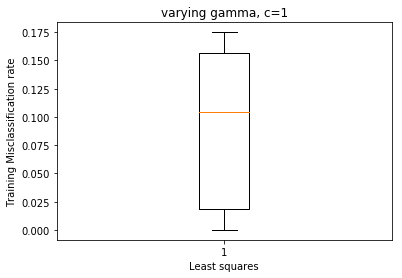

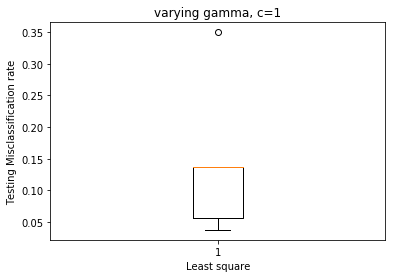

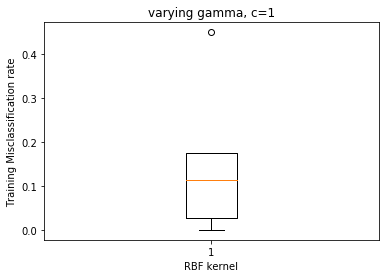

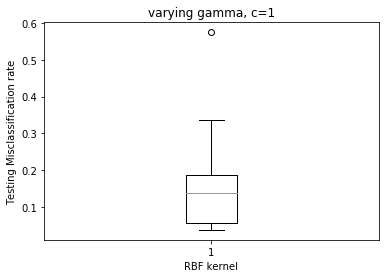

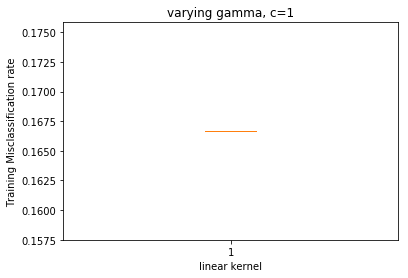

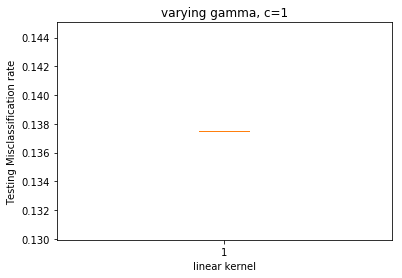

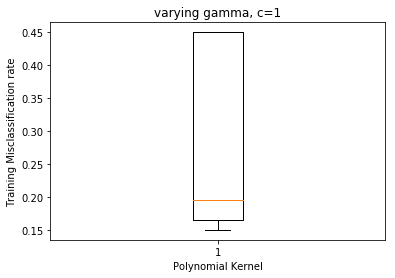

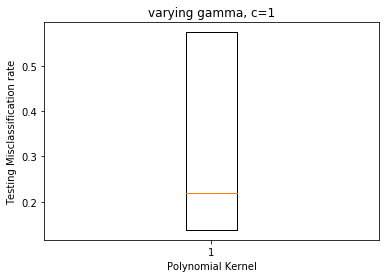

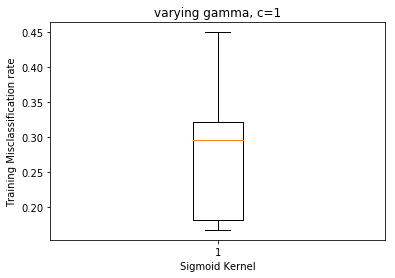

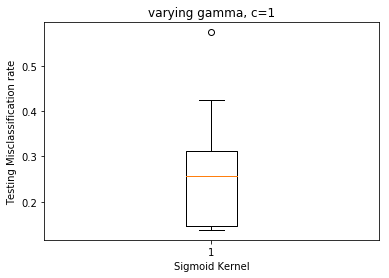

In [26]:
plt.boxplot(trainMissLS)
plt.title('varying gamma, c=1')
plt.xlabel('Least squares')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissLS)
plt.title('varying gamma, c=1')
plt.xlabel('Least square')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissRBF)
plt.title('varying gamma, c=1')
plt.xlabel('RBF kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissRBF)
plt.title('varying gamma, c=1')
plt.xlabel('RBF kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMisslin)
plt.title('varying gamma, c=1')
plt.xlabel('linear kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMisslin)
plt.title('varying gamma, c=1')
plt.xlabel('linear kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissPoly)
plt.title('varying gamma, c=1')
plt.xlabel('Polynomial Kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissPoly)
plt.title('varying gamma, c=1')
plt.xlabel('Polynomial Kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissSig)
plt.title('varying gamma, c=1')
plt.xlabel('Sigmoid Kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissSig)
plt.title('varying gamma, c=1')
plt.xlabel('Sigmoid Kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()



In [36]:
Cs= [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 500, 1000]

trainMissLSC= []
testMissLSC= []

trainMissRBFC= []
testMissRBFC= []

trainMisslinC= []
testMisslinC= []

trainMissPolyC= []
testMissPolyC= []

trainMissSigC= []
testMissSigC= []

g=0.5
for c in Cs:
    a, b, k= ls_svm(c, g)
    trainMissLSC.append(misclass(a, b, trainx, trainy, g))
    testMissLSC.append(misclass(a, b, testx, testy, g))
        
    clf= SVC(C=c, kernel= 'rbf', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissRBFC.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissRBFC.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'linear', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMisslinC.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMisslinC.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'poly', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissPolyC.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissPolyC.append(misclassSVC(testx, testy, predTe))
        
    clf= SVC(C=c, kernel= 'sigmoid', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)
    trainMissSigC.append(misclassSVC(trainx, trainy, predTr))
    predTe= clf.predict(testx)
    testMissSigC.append(misclassSVC(testx, testy, predTe))
                    

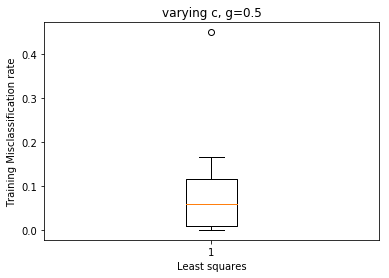

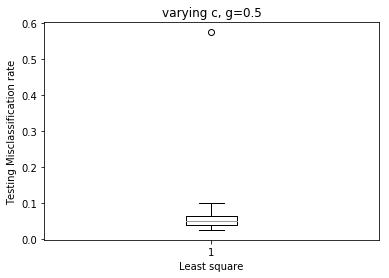

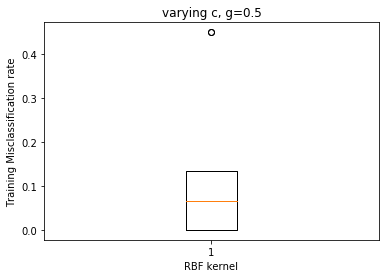

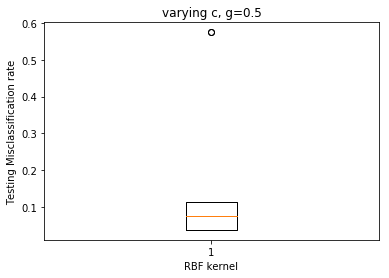

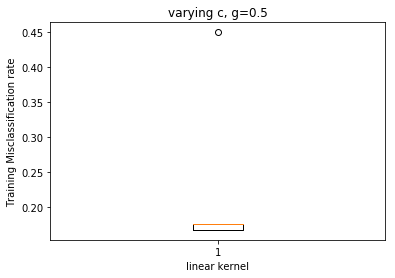

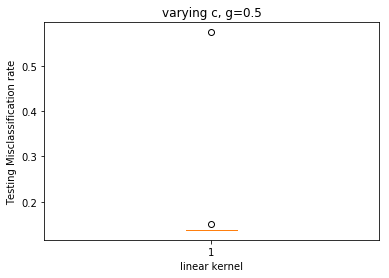

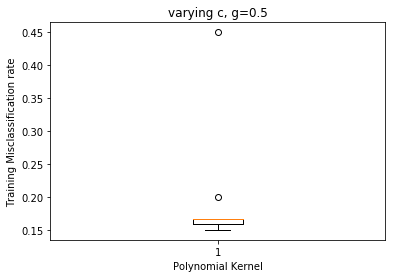

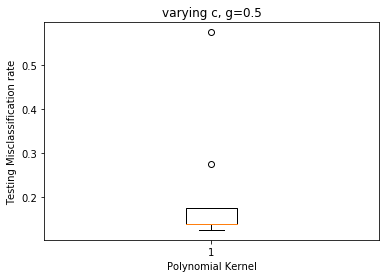

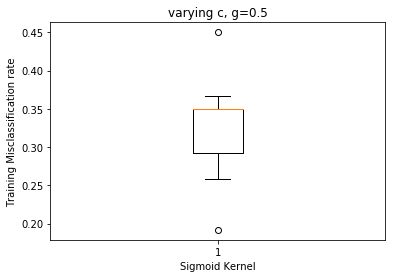

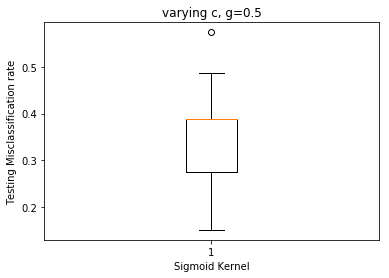

In [37]:
plt.boxplot(trainMissLSC)
plt.title('varying c, g=0.5')
plt.xlabel('Least squares')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissLSC)
plt.title('varying c, g=0.5')
plt.xlabel('Least square')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissRBFC)
plt.title('varying c, g=0.5')
plt.xlabel('RBF kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissRBFC)
plt.title('varying c, g=0.5')
plt.xlabel('RBF kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMisslinC)
plt.title('varying c, g=0.5')
plt.xlabel('linear kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMisslinC)
plt.title('varying c, g=0.5')
plt.xlabel('linear kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissPolyC)
plt.title('varying c, g=0.5')
plt.xlabel('Polynomial Kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissPolyC)
plt.title('varying c, g=0.5')
plt.xlabel('Polynomial Kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

plt.boxplot(trainMissSigC)
plt.title('varying c, g=0.5')
plt.xlabel('Sigmoid Kernel')
plt.ylabel('Training Misclassification rate')
plt.show()

plt.boxplot(testMissSigC)
plt.title('varying c, g=0.5')
plt.xlabel('Sigmoid Kernel')
plt.ylabel('Testing Misclassification rate')
plt.show()

In [34]:
print(trainMissLSC)
print(testMissLSC)

[0.16666666666666666, 0.11666666666666667, 0.058333333333333334, 0.058333333333333334, 0.016666666666666666, 0.008333333333333333, 0.008333333333333333, 0.0]
[0.1, 0.0625, 0.0375, 0.0375, 0.05, 0.025, 0.05, 0.05]


In [30]:
print(misclass(a,b, testx, testy, 1))

0.325
